In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
pd.set_option('max_columns',None) 
pd.set_option('max_row',90) 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


## Data Analytics

### Test Data Shape
* columns: 81 
* Rows: 1460
* features: 80


In [2]:
test_data = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv" , index_col=0)
train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv",index_col =0)
sample_submission = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
print("Test data shape: ",test_data.shape)
test_data.head()

Test data shape:  (1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
sample_submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


### Data Summary


In [4]:
# Get the info for all the columns
test_data.info()
# get all sum nas olumns that have na values
test_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [5]:
# Split data into predection(y) and X
y = test_data.SalePrice

X = test_data.drop(['SalePrice'],axis=1)

### Scatter Plot price vs area

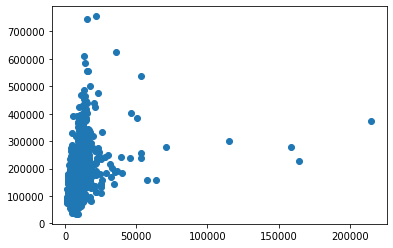

In [6]:
plt.scatter(test_data['LotArea'],test_data['SalePrice'])

# Cleaning 

### Ensure proper data type

In [7]:
# Look for all numeric data
X.select_dtypes(np.number)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010


In [8]:
# Convert all the numeric values that represent categorical data to string
X['MSSubClass'] =X['MSSubClass'].astype(str) 

## Missing Values
### Fill Categorical missing values

In [9]:
X.select_dtypes('object').loc[:,X.isna().sum()>0].columns

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

In [10]:
# Impuete Using a constant value (where NA doesn't mean a category)

for column  in ['Alley','BsmtQual','BsmtCond',
                'BsmtExposure','BsmtFinType1','BsmtFinType2',
                'FireplaceQu','GarageType','GarageFinish',
                'GarageQual','GarageCond','PoolQC','Fence',
                    'MiscFeature']:
    
    X[column] = X[column].fillna('None')



In [11]:
# # Impute Using column mode -> Most frequent value
for column  in ['MasVnrType','Electrical']:
    cmode = X[column].mode()[0]
    X[column] = X[column].fillna(cmode)

In [12]:
X.select_dtypes('object').loc[:,X.isna().sum()>0].columns

Index([], dtype='object')

### Numeric Missing Vaule

using KNN regresseor to find out the missing value in the column on the basics of the other parameters 

In [13]:
from sklearn.neighbors import KNeighborsRegressor

def knn_reg(df,na_target):
    df = df.copy()
    #get the data frame that only has numbers
    numeric_df = df.select_dtypes(np.number)
    
    # Get the columsn which has null (NA) value
    non_na_cols = numeric_df.loc[:,numeric_df.isna().sum()==0].columns
    
    # values of the target columns that are not missing 
    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
    # other colums of the y train
    x_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_cols]
    # examples that have missing values
    x_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_cols]
    
    knn = KNeighborsRegressor()
    knn.fit(x_train,y_train)
    
    y_pred = knn.predict(x_test)
    
    df.loc[df[na_target].isna() == True, na_target] = y_pred
    
    return df

In [14]:
X.columns[X.isna().sum() >0]


Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [15]:
for col in ['MasVnrArea', 'GarageYrBlt']:
    X = knn_reg(X,col)

In [16]:
X.columns[X.isna().sum() >0]

Index(['LotFrontage'], dtype='object')

### Simple Imputer
Imputation uses staticstics on that column to fill in the missing value

In [17]:
# Imputation uses staticstics on that column to fill in the missing value with statistics
# my_imputer = SimpleImputer()
#Remove the non numerical data
# X = test_data.select_dtypes(exclude=['object'])
# imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X))


## Feature Engineering
The data is skwed when the mean and mode is missalignned

In [18]:
## Feature Engineering
import scipy.stats


### Categorical Values
There are 43 values of category


In [19]:
# Get list of categorical variables
s = (X.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)
print(len(object_cols))

Categorical variables:
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
44


In [20]:
from sklearn.preprocessing import OrdinalEncoder

label_X_valid = X.copy()

# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
label_X_valid[object_cols] = ordinal_encoder.fit_transform(X[object_cols])

label_X_valid.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,9.0,3.0,65.0,8450,1.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7,5,2003,2003,1.0,1.0,12.0,13.0,1.0,196.0,2.0,4.0,2.0,2.0,4.0,3.0,2.0,706,6.0,0,150,856,1.0,0.0,1.0,4.0,856,854,0,1710,1,0,2,1,3,1,2.0,8,6.0,0,3.0,1.0,2003.0,2.0,2,548,5.0,5.0,2.0,0,61,0,0,0,0,3.0,4.0,1.0,0,2,2008,8.0,4.0
2,4.0,3.0,80.0,9600,1.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0,6,8,1976,1976,1.0,1.0,8.0,8.0,2.0,0.0,3.0,4.0,1.0,2.0,4.0,1.0,0.0,978,6.0,0,284,1262,1.0,0.0,1.0,4.0,1262,0,0,1262,0,1,2,0,3,1,3.0,6,6.0,1,5.0,1.0,1976.0,2.0,2,460,5.0,5.0,2.0,298,0,0,0,0,0,3.0,4.0,1.0,0,5,2007,8.0,4.0
3,9.0,3.0,68.0,11250,1.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7,5,2001,2002,1.0,1.0,12.0,13.0,1.0,162.0,2.0,4.0,2.0,2.0,4.0,2.0,2.0,486,6.0,0,434,920,1.0,0.0,1.0,4.0,920,866,0,1786,1,0,2,1,3,1,2.0,6,6.0,1,5.0,1.0,2001.0,2.0,2,608,5.0,5.0,2.0,0,42,0,0,0,0,3.0,4.0,1.0,0,9,2008,8.0,4.0
4,10.0,3.0,60.0,9550,1.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,7,5,1915,1970,1.0,1.0,13.0,15.0,2.0,0.0,3.0,4.0,0.0,4.0,1.0,3.0,0.0,216,6.0,0,540,756,1.0,2.0,1.0,4.0,961,756,0,1717,1,0,1,0,3,1,2.0,7,6.0,1,2.0,5.0,1998.0,3.0,3,642,5.0,5.0,2.0,0,35,272,0,0,0,3.0,4.0,1.0,0,2,2006,8.0,0.0
5,9.0,3.0,84.0,14260,1.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,5.0,8,5,2000,2000,1.0,1.0,12.0,13.0,1.0,350.0,2.0,4.0,2.0,2.0,4.0,0.0,2.0,655,6.0,0,490,1145,1.0,0.0,1.0,4.0,1145,1053,0,2198,1,0,2,1,4,1,2.0,9,6.0,1,5.0,1.0,2000.0,2.0,3,836,5.0,5.0,2.0,192,84,0,0,0,0,3.0,4.0,1.0,0,12,2008,8.0,4.0


In [21]:
my_imputer = SimpleImputer(strategy="constant", fill_value=-1)
label_X_valid = pd.DataFrame(my_imputer.fit_transform(label_X_valid),columns=X.columns)
label_X_valid['Neighborhood']

0        5.0
1       24.0
2        5.0
3        6.0
4       15.0
        ... 
1455     8.0
1456    14.0
1457     6.0
1458    12.0
1459     7.0
Name: Neighborhood, Length: 1460, dtype: float64

### Mutual Information
A great first step is to construct a ranking with a feature utility metric, a function measuring associations between a feature and the target. Then you can choose a smaller set of the most useful features to develop initially and have more confidence that your time will be well spent.



Scikit-learn has two mutual information metrics in its feature_selection module: one for real-valued targets (mutual_info_regression) and one for categorical targets (mutual_info_classif). Our target, price, is real-valued. The next cell computes the MI scores for our features and wraps them up in a nice dataframe.


In [22]:
# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(label_X_valid, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

OverallQual     5.798658e-01
GrLivArea       4.329168e-01
LotArea         3.937212e-01
ExterQual       3.196615e-01
MSSubClass      2.792970e-01
GarageFinish    2.664628e-01
LotFrontage     2.180716e-01
GarageType      1.990258e-01
Fireplaces      1.722445e-01
BsmtFinSF1      1.546240e-01
MSZoning        1.204262e-01
WoodDeckSF      1.097118e-01
LotShape        8.719503e-02
BedroomAbvGr    8.019383e-02
HouseStyle      7.473406e-02
CentralAir      5.328565e-02
PavedDrive      4.382480e-02
BsmtCond        3.635759e-02
KitchenAbvGr    2.515454e-02
ExterCond       2.125631e-02
Heating         1.795952e-02
BsmtHalfBath    1.186492e-02
LotConfig       8.394002e-03
YrSold          4.016891e-03
3SsnPorch       1.097845e-03
PoolArea        2.220446e-16
MoSold          0.000000e+00
Name: MI Scores, dtype: float64

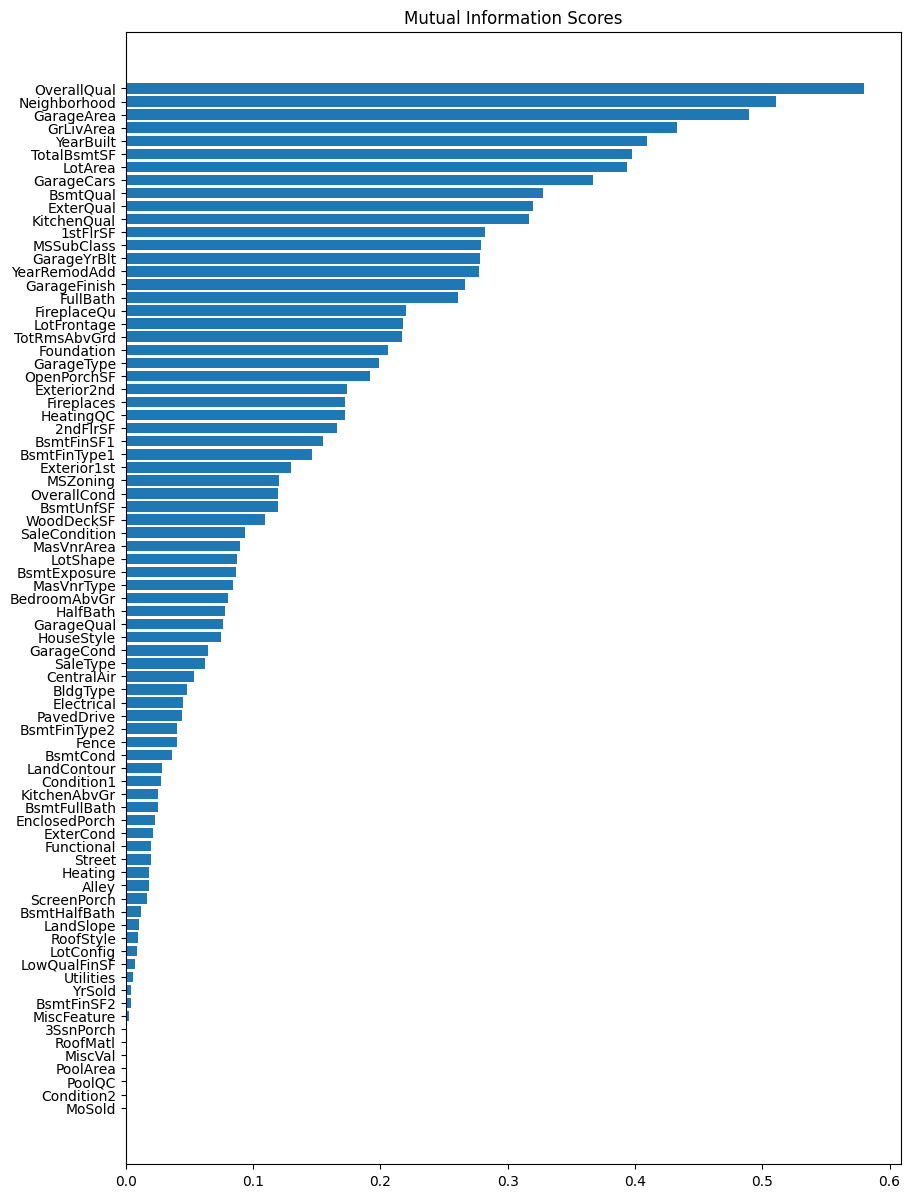

In [23]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(10, 15))
plot_mi_scores(mi_scores)

Data visualization is a great follow-up to a utility ranking. Let's take a closer look at a couple of these

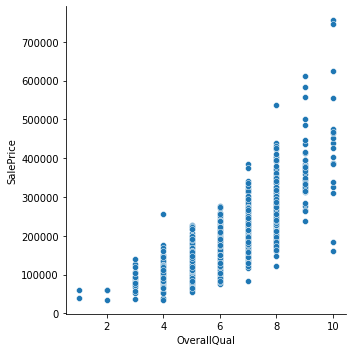

In [24]:
import seaborn as sns
sns.relplot(x="OverallQual", y="SalePrice", data=test_data);

In [25]:
label_X_valid.LotShape

0       3.0
1       3.0
2       0.0
3       0.0
4       0.0
       ... 
1455    3.0
1456    3.0
1457    3.0
1458    3.0
1459    3.0
Name: LotShape, Length: 1460, dtype: float64

In [26]:
X.LotShape

Id
1       Reg
2       Reg
3       IR1
4       IR1
5       IR1
       ... 
1456    Reg
1457    Reg
1458    Reg
1459    Reg
1460    Reg
Name: LotShape, Length: 1460, dtype: object